In [1]:
import h5py
import numpy as np
import math
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline as spline
from scipy.fftpack import fft, fftshift ,ifft,rfft,fftfreq,rfftfreq
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c
Frequency=1/Time

In [2]:
m_r1=np.load('tid_def/SLy.npy')
m_r2=np.load('tid_def/H4.npy')
m_r3=np.load('tid_def/MS1.npy')
m_r4=np.load('tid_def/MPA1.npy')
m_r5=np.load('tid_def/ALF2.npy')
m_r6=np.load('tid_def/MS1b.npy')
m_r7=np.load('tid_def/ENG.npy')
m_r8=np.load('tid_def/2H.npy')


Read metadata

In [3]:

SLy=1
H4=2
MS1=3
MPA1=4
ALF2=5
MS1b=6
ms1b=6
ENG=7


In [4]:
q2 = np.zeros(31)
mas2=np.zeros(31)
eos=np.zeros(31)


i=0
for m in range(0,2):
    for k in range(0,10):
        for j in range(0,10):
            name = 'metadata/BAM:0%s%s%s.txt' %(m,k,j)
            try:
                f=open(name)
                lines=f.readlines() 
                exec(lines[10])
                q2[i] = id_mass_ratio
                exec(lines[8])
                mas2[i]=id_mass
                if i==0:
                    eos[i]=8 #by hand because 2H can not be given a value
                if i>0:
                    exec(lines[15])
                    eos[i]=id_eos
                
                i=i+1
            except OSError:
                pass



Isolate $q=1$ cases

In [5]:
index=[]
j=0
for i in range(len(q2)):
    if q2[i]==1:
        index.insert(j,i)
        j=j+1



Calculate radius for $\frac{M_{total}}{2}$ for each binary for its' EOS

In [6]:
mx=np.amax(m_r1[0])
idx=np.where(m_r1[0]==mx)
idx=idx[0][0]
#cs1=spline(m_r1[0][1:idx],k_l1[0][1:idx])
cs11=spline(m_r1[0][1:idx],m_r1[1][1:idx])

mx=np.amax(m_r2[0])
idx=np.where(m_r2[0]==mx)
idx=idx[0][0]
#cs2=spline(m_r2[0][1:idx],k_l2[0][1:idx])
cs21=spline(m_r2[0][1:idx],m_r2[1][1:idx])

mx=np.amax(m_r3[0])
idx=np.where(m_r3[0]==mx)
idx=idx[0][0]
#cs3=spline(m_r3[0][1:idx],k_l3[0][1:idx])
cs31=spline(m_r3[0][1:idx],m_r3[1][1:idx])

mx=np.amax(m_r4[0])
idx=np.where(m_r4[0]==mx)
idx=idx[0][0]
#cs4=spline(m_r4[0][1:idx],k_l4[0][1:idx])
cs41=spline(m_r4[0][1:idx],m_r4[1][1:idx])

mx=np.amax(m_r5[0])
idx=np.where(m_r5[0]==mx)
idx=idx[0][0]
#cs5=spline(m_r5[0][1:idx],k_l5[0][1:idx])
cs51=spline(m_r5[0][1:idx],m_r5[1][1:idx])

mx=np.amax(m_r6[0])
idx=np.where(m_r6[0]==mx)
idx=idx[0][0]
#cs6=spline(m_r6[0][1:idx],k_l6[0][1:idx])
cs61=spline(m_r6[0][1:idx],m_r6[1][1:idx])

mx=np.amax(m_r7[0])
idx=np.where(m_r7[0]==mx)
idx=idx[0][0]
#cs7=spline(m_r7[0][1:idx],k_l7[0][1:idx])
cs71=spline(m_r7[0][1:idx],m_r7[1][1:idx])

mx=np.amax(m_r8[0])
idx=np.where(m_r8[0]==mx)
idx=idx[0][0]
#cs8=spline(m_r8[0][1:idx],k_l8[0][1:idx])
cs81=spline(m_r8[0][1:idx],m_r8[1][1:idx])

In [7]:
r=np.zeros(31)
for i in range(31):
    if eos[i]==1:
        r[i]=cs11(mas2[i]/2)*Length/1.0e5
        
        
    elif eos[i]==2:
        r[i]=cs21(mas2[i]/2)*Length/1.0e5
        
    elif eos[i]==3:
        r[i]=cs31(mas2[i]/2)*Length/1.0e5
        
    elif eos[i]==4:
        r[i]=cs41(mas2[i]/2)*Length/1.0e5
        
    elif eos[i]==5:
        r[i]=cs51(mas2[i]/2)*Length/1.0e5
        
    elif eos[i]==6:
        r[i]=cs61(mas2[i]/2)*Length/1.0e5
        
    elif eos[i]==7:
        r[i]=cs71(mas2[i]/2)*Length/1.0e5
        
    elif eos[i]==8:
        r[i]=cs81(mas2[i]/2)*Length/1.0e5
        
    

Plot EOS and place each binary for $q=1$

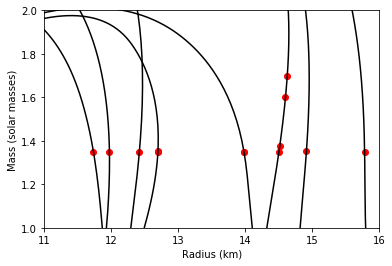

In [8]:
plt.plot(m_r1[1]*Length/1.0e5,m_r1[0],color='black')
plt.plot(m_r2[1]*Length/1.0e5,m_r2[0],color='black')
plt.plot(m_r3[1]*Length/1.0e5,m_r3[0],color='black')
plt.plot(m_r4[1]*Length/1.0e5,m_r4[0],color='black')
plt.plot(m_r5[1]*Length/1.0e5,m_r5[0],color='black')
plt.plot(m_r6[1]*Length/1.0e5,m_r6[0],color='black')
plt.plot(m_r7[1]*Length/1.0e5,m_r7[0],color='black')
plt.plot(m_r8[1]*Length/1.0e5,m_r8[0],color='black')
plt.xlim(11,16)
plt.ylim(1,2)
for i in index:
    plt.scatter(r[i],mas2[i]/2,color='r')
    

plt.xlabel('Radius (km)')
plt.ylabel('Mass (solar masses)')
plt.show()

In [9]:

print(' q    eos   Mass  Radius')
for i in range(mas2.size):
    
    if q2[i]==1:
        print(q2[i],'|',eos[i],'|','%.1f' %mas2[i],'|','%.1f' %r[j])
        

 q    eos   Mass  Radius
1.0 | 8.0 | 2.7 | 14.9
1.0 | 5.0 | 2.7 | 14.9
1.0 | 5.0 | 2.7 | 14.9
1.0 | 7.0 | 2.7 | 14.9
1.0 | 2.0 | 2.7 | 14.9
1.0 | 2.0 | 2.7 | 14.9
1.0 | 4.0 | 2.7 | 14.9
1.0 | 3.0 | 2.7 | 14.9
1.0 | 6.0 | 2.7 | 14.9
1.0 | 6.0 | 2.8 | 14.9
1.0 | 6.0 | 3.2 | 14.9
1.0 | 6.0 | 3.4 | 14.9
1.0 | 1.0 | 2.7 | 14.9


Plot EOS and place each binary for all cases

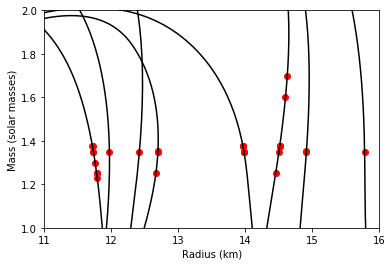

In [10]:
plt.plot(m_r1[1]*Length/1.0e5,m_r1[0],color='black')
plt.plot(m_r2[1]*Length/1.0e5,m_r2[0],color='black')
plt.plot(m_r3[1]*Length/1.0e5,m_r3[0],color='black')
plt.plot(m_r4[1]*Length/1.0e5,m_r4[0],color='black')
plt.plot(m_r5[1]*Length/1.0e5,m_r5[0],color='black')
plt.plot(m_r6[1]*Length/1.0e5,m_r6[0],color='black')
plt.plot(m_r7[1]*Length/1.0e5,m_r7[0],color='black')
plt.plot(m_r8[1]*Length/1.0e5,m_r8[0],color='black')
plt.xlim(11,16)
plt.ylim(1,2)
for i in range(31):
    plt.scatter(r[i],mas2[i]/2,color='r')
    

plt.xlabel('Radius (km)')
plt.ylabel('Mass (solar masses)')
plt.show()

In [11]:

print(' q    eos   Mass  Radius')
for i in range(mas2.size):
    print('%.2f' %q2[i],'|',eos[i],'|','%.1f' %mas2[i],'|','%.3f' %r[i])
    

 q    eos   Mass  Radius
1.00 | 8.0 | 2.7 | 15.785
1.00 | 5.0 | 2.7 | 12.698
1.00 | 5.0 | 2.7 | 12.698
1.27 | 5.0 | 2.5 | 12.668
1.16 | 5.0 | 2.7 | 12.698
1.00 | 7.0 | 2.7 | 11.974
1.00 | 2.0 | 2.7 | 13.983
1.00 | 2.0 | 2.7 | 13.983
1.16 | 2.0 | 2.7 | 13.983
1.25 | 2.0 | 2.8 | 13.968
1.50 | 2.0 | 2.8 | 13.968
1.75 | 2.0 | 2.8 | 13.968
1.00 | 4.0 | 2.7 | 12.421
1.16 | 3.0 | 2.7 | 14.916
1.00 | 3.0 | 2.7 | 14.916
1.00 | 6.0 | 2.7 | 14.506
1.00 | 6.0 | 2.8 | 14.517
1.27 | 6.0 | 2.5 | 14.457
1.25 | 6.0 | 2.8 | 14.517
1.00 | 6.0 | 3.2 | 14.603
1.50 | 6.0 | 2.8 | 14.517
1.00 | 6.0 | 3.4 | 14.630
1.75 | 6.0 | 2.8 | 14.517
1.00 | 1.0 | 2.7 | 11.735
1.22 | 1.0 | 2.5 | 11.792
1.27 | 1.0 | 2.5 | 11.784
1.17 | 1.0 | 2.6 | 11.761
1.16 | 1.0 | 2.7 | 11.735
1.50 | 1.0 | 2.5 | 11.784
1.25 | 1.0 | 2.8 | 11.721
1.50 | 1.0 | 2.7 | 11.722
